# Softmax Logistic Regression
Creation of the logistic regression model for Iris to perform multiclass classification on all the attributes of the set.

- Carrying out the definition of the architecture using both the high and medium level interfaces.
- Multiclass accuracy programming and evaluate the model with this metric.

In [50]:
import os
from itertools import islice as take
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets.utils import download_url
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
base_dir = './data/iris/'
filename = 'iris.csv'
filepath = os.path.join(base_dir, 'iris.csv')
from sklearn.model_selection import train_test_split
SEED = 1
torch.manual_seed(SEED)

## Data

We will use a reference set called Iris collected by Ronald Fisher (yes, the same one from the Fisher-Yates shuffling algorithm). This set has four input attributes: the widths and lengths of the petals and sepals; Ytres clases de flor iris de salida: setosa, versicolour, virginica.

![Pétalo y sépalo](https://miro.medium.com/max/2550/1*7bnLKsChXq94QjtAiRn40w.png)
<center>Fuente: Suruchi Fialoke, October 13, 2016, Classification of Iris Varieties</center>

This set has 50 samples of each class, let's read it and print the first five of each class.

### Download and codification of dataset

In [51]:
download_url(URL, base_dir, filename)
columns = ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species')
df = pd.read_csv('./data/iris/iris.csv', names=columns)
df.loc[df.Species=='Iris-setosa', 'Species'] = 0
df.loc[df.Species=='Iris-versicolor', 'Species'] = 1
df.loc[df.Species=='Iris-virginica', 'Species'] = 2
x_trn = np.array(df.iloc[:,:4], dtype="float32")
y_trn = np.array(df.iloc[:, -1], dtype="float32")
print(x_trn.shape)
print(y_trn.shape)
pd.concat((df[1:5], df[50:55], df[100:105]))  

Using downloaded and verified file: ./data/iris/iris.csv
(150, 4)
(150,)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
100,6.3,3.3,6.0,2.5,2


### Training data / Test data

In [52]:
x_train,x_test, y_train, y_test = train_test_split(x_trn, y_trn, test_size=0.20, shuffle=True)

In [53]:
x_train.shape

(120, 4)

### Model

In [54]:
class RegresionLogisticaMulticlase(nn.Module):
    def __init__(self, input_dim):
        super(RegresionLogisticaMulticlase, self).__init__()
        self.fc = nn.Linear(input_dim,3)
        
    def forward(self, x):
        x = self.fc(x)
        x = torch.sigmoid(x)
        x = F.softmax(x)
        return x

In [55]:
modelo = RegresionLogisticaMulticlase(x_train.shape[1])
losses = []


optimizer = optim.SGD(modelo.parameters(), lr=0.05)

loss_fn = nn.CrossEntropyLoss()
epocas = 5000

x_train, y_train = Variable(torch.from_numpy(x_train)).float(), Variable(torch.from_numpy(y_train)).long()
for epoca in range(1, epocas+1):
    print ("Epoca #",epoca)
    y_pred = modelo(x_train)
    loss = loss_fn(y_pred, y_train)
    print ("El valor de la función de perdida es: ", loss.item()*100)
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step() 
    losses.append(loss.item()*100)
    

Epoca # 1
El valor de la función de perdida es:  110.14326810836792
Epoca # 2
El valor de la función de perdida es:  110.10361909866333
Epoca # 3
El valor de la función de perdida es:  110.06380319595337
Epoca # 4
El valor de la función de perdida es:  110.02384424209595
Epoca # 5
El valor de la función de perdida es:  109.98355150222778
Epoca # 6
El valor de la función de perdida es:  109.94302034378052
Epoca # 7
El valor de la función de perdida es:  109.90216732025146
Epoca # 8
El valor de la función de perdida es:  109.8609447479248
Epoca # 9
El valor de la función de perdida es:  109.81934070587158
Epoca # 10
El valor de la función de perdida es:  109.77730751037598
Epoca # 11
El valor de la función de perdida es:  109.7348690032959
Epoca # 12
El valor de la función de perdida es:  109.69198942184448
Epoca # 13
El valor de la función de perdida es:  109.64862108230591
Epoca # 14
El valor de la función de perdida es:  109.604811668396
Epoca # 15
El valor de la función de perdida es

<ipython-input-54-062fd2a417fe>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


El valor de la función de perdida es:  104.85389232635498
Epoca # 206
El valor de la función de perdida es:  104.83720302581787
Epoca # 207
El valor de la función de perdida es:  104.82057332992554
Epoca # 208
El valor de la función de perdida es:  104.80401515960693
Epoca # 209
El valor de la función de perdida es:  104.78745698928833
Epoca # 210
El valor de la función de perdida es:  104.77097034454346
Epoca # 211
El valor de la función de perdida es:  104.7545313835144
Epoca # 212
El valor de la función de perdida es:  104.7381043434143
Epoca # 213
El valor de la función de perdida es:  104.72172498703003
Epoca # 214
El valor de la función de perdida es:  104.70545291900635
Epoca # 215
El valor de la función de perdida es:  104.68919277191162
Epoca # 216
El valor de la función de perdida es:  104.67296838760376
Epoca # 217
El valor de la función de perdida es:  104.65677976608276
Epoca # 218
El valor de la función de perdida es:  104.64069843292236
Epoca # 219
El valor de la función

El valor de la función de perdida es:  102.24711894989014
Epoca # 424
El valor de la función de perdida es:  102.23910808563232
Epoca # 425
El valor de la función de perdida es:  102.23112106323242
Epoca # 426
El valor de la función de perdida es:  102.22312211990356
Epoca # 427
El valor de la función de perdida es:  102.21520662307739
Epoca # 428
El valor de la función de perdida es:  102.20727920532227
Epoca # 429
El valor de la función de perdida es:  102.19939947128296
Epoca # 430
El valor de la función de perdida es:  102.1915078163147
Epoca # 431
El valor de la función de perdida es:  102.18367576599121
Epoca # 432
El valor de la función de perdida es:  102.17586755752563
Epoca # 433
El valor de la función de perdida es:  102.16807126998901
Epoca # 434
El valor de la función de perdida es:  102.16028690338135
Epoca # 435
El valor de la función de perdida es:  102.15257406234741
Epoca # 436
El valor de la función de perdida es:  102.14484930038452
Epoca # 437
El valor de la funció

Epoca # 653
El valor de la función de perdida es:  100.9249210357666
Epoca # 654
El valor de la función de perdida es:  100.92084407806396
Epoca # 655
El valor de la función de perdida es:  100.91677904129028
Epoca # 656
El valor de la función de perdida es:  100.91270208358765
Epoca # 657
El valor de la función de perdida es:  100.90868473052979
Epoca # 658
El valor de la función de perdida es:  100.90464353561401
Epoca # 659
El valor de la función de perdida es:  100.90060234069824
Epoca # 660
El valor de la función de perdida es:  100.89660882949829
Epoca # 661
El valor de la función de perdida es:  100.89260339736938
Epoca # 662
El valor de la función de perdida es:  100.88859796524048
Epoca # 663
El valor de la función de perdida es:  100.88462829589844
Epoca # 664
El valor de la función de perdida es:  100.88064670562744
Epoca # 665
El valor de la función de perdida es:  100.87671279907227
Epoca # 666
El valor de la función de perdida es:  100.87273120880127
Epoca # 667
El valor 

El valor de la función de perdida es:  100.22803544998169
Epoca # 872
El valor de la función de perdida es:  100.22553205490112
Epoca # 873
El valor de la función de perdida es:  100.22304058074951
Epoca # 874
El valor de la función de perdida es:  100.22052526473999
Epoca # 875
El valor de la función de perdida es:  100.21802186965942
Epoca # 876
El valor de la función de perdida es:  100.21555423736572
Epoca # 877
El valor de la función de perdida es:  100.2130389213562
Epoca # 878
El valor de la función de perdida es:  100.21060705184937
Epoca # 879
El valor de la función de perdida es:  100.20812749862671
Epoca # 880
El valor de la función de perdida es:  100.20561218261719
Epoca # 881
El valor de la función de perdida es:  100.2031683921814
Epoca # 882
El valor de la función de perdida es:  100.20067691802979
Epoca # 883
El valor de la función de perdida es:  100.19820928573608
Epoca # 884
El valor de la función de perdida es:  100.19575357437134
Epoca # 885
El valor de la función

El valor de la función de perdida es:  99.75667595863342
Epoca # 1100
El valor de la función de perdida es:  99.75497126579285
Epoca # 1101
El valor de la función de perdida es:  99.75327253341675
Epoca # 1102
El valor de la función de perdida es:  99.75155591964722
Epoca # 1103
El valor de la función de perdida es:  99.74986910820007
Epoca # 1104
El valor de la función de perdida es:  99.74819421768188
Epoca # 1105
El valor de la función de perdida es:  99.74644184112549
Epoca # 1106
El valor de la función de perdida es:  99.74479079246521
Epoca # 1107
El valor de la función de perdida es:  99.74308609962463
Epoca # 1108
El valor de la función de perdida es:  99.74139928817749
Epoca # 1109
El valor de la función de perdida es:  99.73970055580139
Epoca # 1110
El valor de la función de perdida es:  99.7380256652832
Epoca # 1111
El valor de la función de perdida es:  99.73634481430054
Epoca # 1112
El valor de la función de perdida es:  99.73466396331787
Epoca # 1113
El valor de la funció

Epoca # 1314
El valor de la función de perdida es:  99.4379460811615
Epoca # 1315
El valor de la función de perdida es:  99.4366705417633
Epoca # 1316
El valor de la función de perdida es:  99.4353711605072
Epoca # 1317
El valor de la función de perdida es:  99.43405985832214
Epoca # 1318
El valor de la función de perdida es:  99.4328260421753
Epoca # 1319
El valor de la función de perdida es:  99.43154454231262
Epoca # 1320
El valor de la función de perdida es:  99.43022131919861
Epoca # 1321
El valor de la función de perdida es:  99.42895770072937
Epoca # 1322
El valor de la función de perdida es:  99.42765831947327
Epoca # 1323
El valor de la función de perdida es:  99.4263768196106
Epoca # 1324
El valor de la función de perdida es:  99.4251012802124
Epoca # 1325
El valor de la función de perdida es:  99.4238555431366
Epoca # 1326
El valor de la función de perdida es:  99.42260980606079
Epoca # 1327
El valor de la función de perdida es:  99.42131638526917
Epoca # 1328
El valor de la

Epoca # 1457
El valor de la función de perdida es:  99.26727414131165
Epoca # 1458
El valor de la función de perdida es:  99.26614761352539
Epoca # 1459
El valor de la función de perdida es:  99.26502704620361
Epoca # 1460
El valor de la función de perdida es:  99.263995885849
Epoca # 1461
El valor de la función de perdida es:  99.26283359527588
Epoca # 1462
El valor de la función de perdida es:  99.26176071166992
Epoca # 1463
El valor de la función de perdida es:  99.26065802574158
Epoca # 1464
El valor de la función de perdida es:  99.2595374584198
Epoca # 1465
El valor de la función de perdida es:  99.25848245620728
Epoca # 1466
El valor de la función de perdida es:  99.25737977027893
Epoca # 1467
El valor de la función de perdida es:  99.25625324249268
Epoca # 1468
El valor de la función de perdida es:  99.25516843795776
Epoca # 1469
El valor de la función de perdida es:  99.25407767295837
Epoca # 1470
El valor de la función de perdida es:  99.2529809474945
Epoca # 1471
El valor de

Epoca # 1663
El valor de la función de perdida es:  99.06032681465149
Epoca # 1664
El valor de la función de perdida es:  99.05937314033508
Epoca # 1665
El valor de la función de perdida es:  99.05844926834106
Epoca # 1666
El valor de la función de perdida es:  99.057537317276
Epoca # 1667
El valor de la función de perdida es:  99.0566611289978
Epoca # 1668
El valor de la función de perdida es:  99.05571341514587
Epoca # 1669
El valor de la función de perdida es:  99.05480742454529
Epoca # 1670
El valor de la función de perdida es:  99.05389547348022
Epoca # 1671
El valor de la función de perdida es:  99.05298948287964
Epoca # 1672
El valor de la función de perdida es:  99.05211925506592
Epoca # 1673
El valor de la función de perdida es:  99.05115962028503
Epoca # 1674
El valor de la función de perdida es:  99.0502417087555
Epoca # 1675
El valor de la función de perdida es:  99.04937148094177
Epoca # 1676
El valor de la función de perdida es:  99.0484356880188
Epoca # 1677
El valor de 

Epoca # 1877
El valor de la función de perdida es:  98.87986779212952
Epoca # 1878
El valor de la función de perdida es:  98.87910485267639
Epoca # 1879
El valor de la función de perdida es:  98.87831807136536
Epoca # 1880
El valor de la función de perdida es:  98.87754321098328
Epoca # 1881
El valor de la función de perdida es:  98.87673854827881
Epoca # 1882
El valor de la función de perdida es:  98.87599349021912
Epoca # 1883
El valor de la función de perdida es:  98.87521266937256
Epoca # 1884
El valor de la función de perdida es:  98.87444376945496
Epoca # 1885
El valor de la función de perdida es:  98.87367486953735
Epoca # 1886
El valor de la función de perdida es:  98.87285232543945
Epoca # 1887
El valor de la función de perdida es:  98.87211322784424
Epoca # 1888
El valor de la función de perdida es:  98.87135028839111
Epoca # 1889
El valor de la función de perdida es:  98.87056946754456
Epoca # 1890
El valor de la función de perdida es:  98.86981248855591
Epoca # 1891
El valo

Epoca # 2091
El valor de la función de perdida es:  98.72451424598694
Epoca # 2092
El valor de la función de perdida es:  98.72385859489441
Epoca # 2093
El valor de la función de perdida es:  98.72319102287292
Epoca # 2094
El valor de la función de perdida es:  98.72251152992249
Epoca # 2095
El valor de la función de perdida es:  98.72181415557861
Epoca # 2096
El valor de la función de perdida es:  98.72114658355713
Epoca # 2097
El valor de la función de perdida es:  98.72047305107117
Epoca # 2098
El valor de la función de perdida es:  98.71978759765625
Epoca # 2099
El valor de la función de perdida es:  98.71912002563477
Epoca # 2100
El valor de la función de perdida es:  98.7183928489685
Epoca # 2101
El valor de la función de perdida es:  98.71776103973389
Epoca # 2102
El valor de la función de perdida es:  98.71708154678345
Epoca # 2103
El valor de la función de perdida es:  98.71641993522644
Epoca # 2104
El valor de la función de perdida es:  98.71575236320496
Epoca # 2105
El valor

El valor de la función de perdida es:  98.58837127685547
Epoca # 2305
El valor de la función de perdida es:  98.58778119087219
Epoca # 2306
El valor de la función de perdida es:  98.58713746070862
Epoca # 2307
El valor de la función de perdida es:  98.58656525611877
Epoca # 2308
El valor de la función de perdida es:  98.58596324920654
Epoca # 2309
El valor de la función de perdida es:  98.5853374004364
Epoca # 2310
El valor de la función de perdida es:  98.58474135398865
Epoca # 2311
El valor de la función de perdida es:  98.58413934707642
Epoca # 2312
El valor de la función de perdida es:  98.58353734016418
Epoca # 2313
El valor de la función de perdida es:  98.58295917510986
Epoca # 2314
El valor de la función de perdida es:  98.58235120773315
Epoca # 2315
El valor de la función de perdida es:  98.5817551612854
Epoca # 2316
El valor de la función de perdida es:  98.5811173915863
Epoca # 2317
El valor de la función de perdida es:  98.58054518699646
Epoca # 2318
El valor de la función 

El valor de la función de perdida es:  98.49113821983337
Epoca # 2473
El valor de la función de perdida es:  98.49054217338562
Epoca # 2474
El valor de la función de perdida es:  98.49000573158264
Epoca # 2475
El valor de la función de perdida es:  98.48948121070862
Epoca # 2476
El valor de la función de perdida es:  98.48887920379639
Epoca # 2477
El valor de la función de perdida es:  98.48835468292236
Epoca # 2478
El valor de la función de perdida es:  98.48777651786804
Epoca # 2479
El valor de la función de perdida es:  98.4872043132782
Epoca # 2480
El valor de la función de perdida es:  98.48668575286865
Epoca # 2481
El valor de la función de perdida es:  98.48613142967224
Epoca # 2482
El valor de la función de perdida es:  98.48556518554688
Epoca # 2483
El valor de la función de perdida es:  98.48502278327942
Epoca # 2484
El valor de la función de perdida es:  98.48443865776062
Epoca # 2485
El valor de la función de perdida es:  98.4839141368866
Epoca # 2486
El valor de la función

Epoca # 2599
El valor de la función de perdida es:  98.42250347137451
Epoca # 2600
El valor de la función de perdida es:  98.42198491096497
Epoca # 2601
El valor de la función de perdida es:  98.42146635055542
Epoca # 2602
El valor de la función de perdida es:  98.42093586921692
Epoca # 2603
El valor de la función de perdida es:  98.42044711112976
Epoca # 2604
El valor de la función de perdida es:  98.41988682746887
Epoca # 2605
El valor de la función de perdida es:  98.41938614845276
Epoca # 2606
El valor de la función de perdida es:  98.4188437461853
Epoca # 2607
El valor de la función de perdida es:  98.41833114624023
Epoca # 2608
El valor de la función de perdida es:  98.41782450675964
Epoca # 2609
El valor de la función de perdida es:  98.41728806495667
Epoca # 2610
El valor de la función de perdida es:  98.41676354408264
Epoca # 2611
El valor de la función de perdida es:  98.41623902320862
Epoca # 2612
El valor de la función de perdida es:  98.4157145023346
Epoca # 2613
El valor 

El valor de la función de perdida es:  98.35910201072693
Epoca # 2724
El valor de la función de perdida es:  98.3586072921753
Epoca # 2725
El valor de la función de perdida es:  98.35811257362366
Epoca # 2726
El valor de la función de perdida es:  98.35759401321411
Epoca # 2727
El valor de la función de perdida es:  98.35709929466248
Epoca # 2728
El valor de la función de perdida es:  98.35659861564636
Epoca # 2729
El valor de la función de perdida es:  98.35611581802368
Epoca # 2730
El valor de la función de perdida es:  98.35562109947205
Epoca # 2731
El valor de la función de perdida es:  98.35512638092041
Epoca # 2732
El valor de la función de perdida es:  98.35460782051086
Epoca # 2733
El valor de la función de perdida es:  98.35410714149475
Epoca # 2734
El valor de la función de perdida es:  98.35361242294312
Epoca # 2735
El valor de la función de perdida es:  98.35309982299805
Epoca # 2736
El valor de la función de perdida es:  98.35261702537537
Epoca # 2737
El valor de la funció

El valor de la función de perdida es:  98.2893168926239
Epoca # 2868
El valor de la función de perdida es:  98.2888400554657
Epoca # 2869
El valor de la función de perdida es:  98.28837513923645
Epoca # 2870
El valor de la función de perdida es:  98.28789830207825
Epoca # 2871
El valor de la función de perdida es:  98.28740954399109
Epoca # 2872
El valor de la función de perdida es:  98.28697443008423
Epoca # 2873
El valor de la función de perdida es:  98.28650951385498
Epoca # 2874
El valor de la función de perdida es:  98.28603267669678
Epoca # 2875
El valor de la función de perdida es:  98.28553795814514
Epoca # 2876
El valor de la función de perdida es:  98.2850730419159
Epoca # 2877
El valor de la función de perdida es:  98.28462600708008
Epoca # 2878
El valor de la función de perdida es:  98.2841432094574
Epoca # 2879
El valor de la función de perdida es:  98.28367233276367
Epoca # 2880
El valor de la función de perdida es:  98.2832133769989
Epoca # 2881
El valor de la función de

Epoca # 3009
El valor de la función de perdida es:  98.22413325309753
Epoca # 3010
El valor de la función de perdida es:  98.22369813919067
Epoca # 3011
El valor de la función de perdida es:  98.22323322296143
Epoca # 3012
El valor de la función de perdida es:  98.222815990448
Epoca # 3013
El valor de la función de perdida es:  98.22233319282532
Epoca # 3014
El valor de la función de perdida es:  98.22190999984741
Epoca # 3015
El valor de la función de perdida es:  98.2214629650116
Epoca # 3016
El valor de la función de perdida es:  98.22099804878235
Epoca # 3017
El valor de la función de perdida es:  98.22056889533997
Epoca # 3018
El valor de la función de perdida es:  98.2201337814331
Epoca # 3019
El valor de la función de perdida es:  98.21968078613281
Epoca # 3020
El valor de la función de perdida es:  98.21922183036804
Epoca # 3021
El valor de la función de perdida es:  98.21876287460327
Epoca # 3022
El valor de la función de perdida es:  98.21833372116089
Epoca # 3023
El valor de

El valor de la función de perdida es:  98.15751314163208
Epoca # 3163
El valor de la función de perdida es:  98.15705418586731
Epoca # 3164
El valor de la función de perdida es:  98.15666675567627
Epoca # 3165
El valor de la función de perdida es:  98.15623760223389
Epoca # 3166
El valor de la función de perdida es:  98.15579056739807
Epoca # 3167
El valor de la función de perdida es:  98.15537929534912
Epoca # 3168
El valor de la función de perdida es:  98.1549620628357
Epoca # 3169
El valor de la función de perdida es:  98.1545627117157
Epoca # 3170
El valor de la función de perdida es:  98.1541395187378
Epoca # 3171
El valor de la función de perdida es:  98.15368056297302
Epoca # 3172
El valor de la función de perdida es:  98.15325140953064
Epoca # 3173
El valor de la función de perdida es:  98.15285205841064
Epoca # 3174
El valor de la función de perdida es:  98.15245270729065
Epoca # 3175
El valor de la función de perdida es:  98.15202355384827
Epoca # 3176
El valor de la función 

Epoca # 3291
El valor de la función de perdida es:  98.10393452644348
Epoca # 3292
El valor de la función de perdida es:  98.10349345207214
Epoca # 3293
El valor de la función de perdida es:  98.10312390327454
Epoca # 3294
El valor de la función de perdida es:  98.10270667076111
Epoca # 3295
El valor de la función de perdida es:  98.10227155685425
Epoca # 3296
El valor de la función de perdida es:  98.10189008712769
Epoca # 3297
El valor de la función de perdida es:  98.10149073600769
Epoca # 3298
El valor de la función de perdida es:  98.10106158256531
Epoca # 3299
El valor de la función de perdida es:  98.10068607330322
Epoca # 3300
El valor de la función de perdida es:  98.10024499893188
Epoca # 3301
El valor de la función de perdida es:  98.0998694896698
Epoca # 3302
El valor de la función de perdida es:  98.09947609901428
Epoca # 3303
El valor de la función de perdida es:  98.09904098510742
Epoca # 3304
El valor de la función de perdida es:  98.09866547584534
Epoca # 3305
El valor

El valor de la función de perdida es:  98.054438829422
Epoca # 3416
El valor de la función de perdida es:  98.05405139923096
Epoca # 3417
El valor de la función de perdida es:  98.05368185043335
Epoca # 3418
El valor de la función de perdida es:  98.05328249931335
Epoca # 3419
El valor de la función de perdida es:  98.05288314819336
Epoca # 3420
El valor de la función de perdida es:  98.05249571800232
Epoca # 3421
El valor de la función de perdida es:  98.05213809013367
Epoca # 3422
El valor de la función de perdida es:  98.05169701576233
Epoca # 3423
El valor de la función de perdida es:  98.05135130882263
Epoca # 3424
El valor de la función de perdida es:  98.05095791816711
Epoca # 3425
El valor de la función de perdida es:  98.05052280426025
Epoca # 3426
El valor de la función de perdida es:  98.05012941360474
Epoca # 3427
El valor de la función de perdida es:  98.04977178573608
Epoca # 3428
El valor de la función de perdida es:  98.04937839508057
Epoca # 3429
El valor de la función

Epoca # 3564
El valor de la función de perdida es:  97.99743294715881
Epoca # 3565
El valor de la función de perdida es:  97.9970395565033
Epoca # 3566
El valor de la función de perdida es:  97.99667000770569
Epoca # 3567
El valor de la función de perdida es:  97.9962944984436
Epoca # 3568
El valor de la función de perdida es:  97.99591302871704
Epoca # 3569
El valor de la función de perdida es:  97.99555540084839
Epoca # 3570
El valor de la función de perdida es:  97.99518585205078
Epoca # 3571
El valor de la función de perdida es:  97.99481630325317
Epoca # 3572
El valor de la función de perdida es:  97.99442291259766
Epoca # 3573
El valor de la función de perdida es:  97.99405932426453
Epoca # 3574
El valor de la función de perdida es:  97.99368381500244
Epoca # 3575
El valor de la función de perdida es:  97.99330234527588
Epoca # 3576
El valor de la función de perdida es:  97.9929506778717
Epoca # 3577
El valor de la función de perdida es:  97.99258708953857
Epoca # 3578
El valor d

Epoca # 3743
El valor de la función de perdida es:  97.93205261230469
Epoca # 3744
El valor de la función de perdida es:  97.9317307472229
Epoca # 3745
El valor de la función de perdida es:  97.93136715888977
Epoca # 3746
El valor de la función de perdida es:  97.93099761009216
Epoca # 3747
El valor de la función de perdida es:  97.93065190315247
Epoca # 3748
El valor de la función de perdida es:  97.93030619621277
Epoca # 3749
El valor de la función de perdida es:  97.9299545288086
Epoca # 3750
El valor de la función de perdida es:  97.92957305908203
Epoca # 3751
El valor de la función de perdida es:  97.92923331260681
Epoca # 3752
El valor de la función de perdida es:  97.92888760566711
Epoca # 3753
El valor de la función de perdida es:  97.92853593826294
Epoca # 3754
El valor de la función de perdida es:  97.92816638946533
Epoca # 3755
El valor de la función de perdida es:  97.92779088020325
Epoca # 3756
El valor de la función de perdida es:  97.92746901512146
Epoca # 3757
El valor 

El valor de la función de perdida es:  97.87697196006775
Epoca # 3902
El valor de la función de perdida es:  97.87663221359253
Epoca # 3903
El valor de la función de perdida es:  97.87633419036865
Epoca # 3904
El valor de la función de perdida es:  97.87597060203552
Epoca # 3905
El valor de la función de perdida es:  97.87565469741821
Epoca # 3906
El valor de la función de perdida es:  97.87527322769165
Epoca # 3907
El valor de la función de perdida es:  97.87493944168091
Epoca # 3908
El valor de la función de perdida es:  97.87461757659912
Epoca # 3909
El valor de la función de perdida es:  97.8742778301239
Epoca # 3910
El valor de la función de perdida es:  97.87391424179077
Epoca # 3911
El valor de la función de perdida es:  97.8735864162445
Epoca # 3912
El valor de la función de perdida es:  97.87323474884033
Epoca # 3913
El valor de la función de perdida es:  97.87293076515198
Epoca # 3914
El valor de la función de perdida es:  97.87257313728333
Epoca # 3915
El valor de la función

El valor de la función de perdida es:  97.81829714775085
Epoca # 4078
El valor de la función de perdida es:  97.8179395198822
Epoca # 4079
El valor de la función de perdida es:  97.81761169433594
Epoca # 4080
El valor de la función de perdida es:  97.81729578971863
Epoca # 4081
El valor de la función de perdida es:  97.81693816184998
Epoca # 4082
El valor de la función de perdida es:  97.8166401386261
Epoca # 4083
El valor de la función de perdida es:  97.81627058982849
Epoca # 4084
El valor de la función de perdida es:  97.81597256660461
Epoca # 4085
El valor de la función de perdida es:  97.81567454338074
Epoca # 4086
El valor de la función de perdida es:  97.81532883644104
Epoca # 4087
El valor de la función de perdida es:  97.81500697135925
Epoca # 4088
El valor de la función de perdida es:  97.81466126441956
Epoca # 4089
El valor de la función de perdida es:  97.81433343887329
Epoca # 4090
El valor de la función de perdida es:  97.81402945518494
Epoca # 4091
El valor de la función

Epoca # 4285
El valor de la función de perdida es:  97.75206446647644
Epoca # 4286
El valor de la función de perdida es:  97.75177836418152
Epoca # 4287
El valor de la función de perdida es:  97.75145053863525
Epoca # 4288
El valor de la función de perdida es:  97.75115251541138
Epoca # 4289
El valor de la función de perdida es:  97.7508008480072
Epoca # 4290
El valor de la función de perdida es:  97.75051474571228
Epoca # 4291
El valor de la función de perdida es:  97.75020480155945
Epoca # 4292
El valor de la función de perdida es:  97.749924659729
Epoca # 4293
El valor de la función de perdida es:  97.74959087371826
Epoca # 4294
El valor de la función de perdida es:  97.749263048172
Epoca # 4295
El valor de la función de perdida es:  97.74897694587708
Epoca # 4296
El valor de la función de perdida es:  97.74866104125977
Epoca # 4297
El valor de la función de perdida es:  97.74834513664246
Epoca # 4298
El valor de la función de perdida es:  97.74805307388306
Epoca # 4299
El valor de 

Epoca # 4504
El valor de la función de perdida es:  97.68579006195068
Epoca # 4505
El valor de la función de perdida es:  97.6854920387268
Epoca # 4506
El valor de la función de perdida es:  97.68521785736084
Epoca # 4507
El valor de la función de perdida es:  97.68489003181458
Epoca # 4508
El valor de la función de perdida es:  97.68463373184204
Epoca # 4509
El valor de la función de perdida es:  97.68432974815369
Epoca # 4510
El valor de la función de perdida es:  97.68401980400085
Epoca # 4511
El valor de la función de perdida es:  97.68374562263489
Epoca # 4512
El valor de la función de perdida es:  97.68342971801758
Epoca # 4513
El valor de la función de perdida es:  97.68313765525818
Epoca # 4514
El valor de la función de perdida es:  97.68283367156982
Epoca # 4515
El valor de la función de perdida es:  97.68255352973938
Epoca # 4516
El valor de la función de perdida es:  97.68226742744446
Epoca # 4517
El valor de la función de perdida es:  97.6819634437561
Epoca # 4518
El valor 

El valor de la función de perdida es:  97.61985540390015
Epoca # 4734
El valor de la función de perdida es:  97.61959314346313
Epoca # 4735
El valor de la función de perdida es:  97.61928915977478
Epoca # 4736
El valor de la función de perdida es:  97.61901497840881
Epoca # 4737
El valor de la función de perdida es:  97.6187527179718
Epoca # 4738
El valor de la función de perdida es:  97.61847853660583
Epoca # 4739
El valor de la función de perdida es:  97.61818647384644
Epoca # 4740
El valor de la función de perdida es:  97.61790037155151
Epoca # 4741
El valor de la función de perdida es:  97.6176381111145
Epoca # 4742
El valor de la función de perdida es:  97.61736392974854
Epoca # 4743
El valor de la función de perdida es:  97.61703610420227
Epoca # 4744
El valor de la función de perdida es:  97.61675596237183
Epoca # 4745
El valor de la función de perdida es:  97.61649370193481
Epoca # 4746
El valor de la función de perdida es:  97.61619567871094
Epoca # 4747
El valor de la función

El valor de la función de perdida es:  97.55837917327881
Epoca # 4958
El valor de la función de perdida es:  97.55809903144836
Epoca # 4959
El valor de la función de perdida es:  97.55785465240479
Epoca # 4960
El valor de la función de perdida es:  97.55757451057434
Epoca # 4961
El valor de la función de perdida es:  97.55733013153076
Epoca # 4962
El valor de la función de perdida es:  97.55701422691345
Epoca # 4963
El valor de la función de perdida es:  97.55676984786987
Epoca # 4964
El valor de la función de perdida es:  97.55648970603943
Epoca # 4965
El valor de la función de perdida es:  97.5562334060669
Epoca # 4966
El valor de la función de perdida es:  97.5559949874878
Epoca # 4967
El valor de la función de perdida es:  97.55572080612183
Epoca # 4968
El valor de la función de perdida es:  97.5554347038269
Epoca # 4969
El valor de la función de perdida es:  97.55515456199646
Epoca # 4970
El valor de la función de perdida es:  97.55488634109497
Epoca # 4971
El valor de la función 

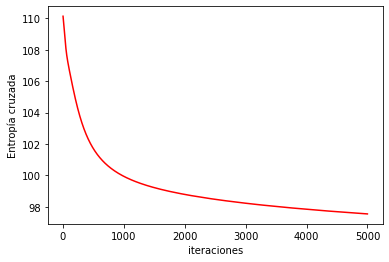

In [56]:
plt.plot(losses, color='red')
plt.xlabel('iteraciones')
plt.ylabel('Entropía cruzada');

### Predictions

In [57]:
X_test = Variable(torch.from_numpy(x_test)).float()
pred = modelo(X_test)

<ipython-input-54-062fd2a417fe>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [58]:
pred = pred.detach().numpy()

In [59]:
print ("Precisión", accuracy_score(y_test, np.argmax(pred, axis=1)))

Precisión 0.6666666666666666


In [62]:
for j in range(len(X_test)):
    y_pred = np.argmax(modelo(X_test[j]).detach().numpy(), axis=0)
    print(f'Valor Verdadero = {y_test[j]} Valor predecido = {y_pred}')

Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 2.0 Valor predecido = 2
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 2.0 Valor predecido = 2
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 2.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 2.0 Valor predecido = 2
Valor Verdadero = 2.0 Valor predecido = 2
Valor Verdadero = 0.0 Valor predecido = 0
Valor Verdadero = 1.0 Valor predecido = 2
Valor Verdadero = 2.0 Valor predec

<ipython-input-54-062fd2a417fe>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
